In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Getting started

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [63]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [64]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Preprocessing

In [65]:
data.drop('CustomerID', axis=1, inplace=True)

In [66]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [67]:
scaler = StandardScaler() 
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [68]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


Clustering

In [69]:
max_clusters = 50

In [70]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

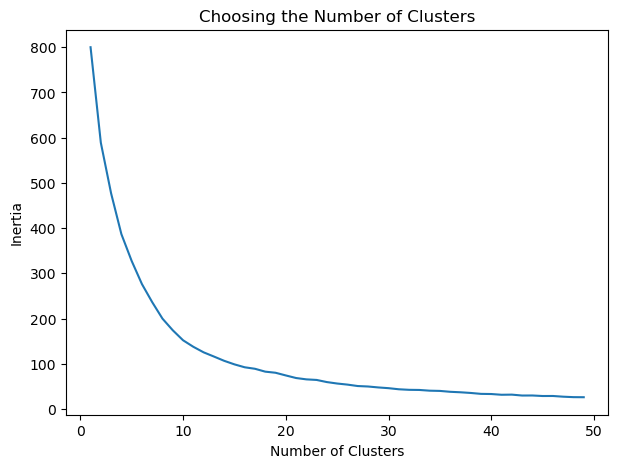

In [71]:
plt.figure(figsize=(7,5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing the Number of Clusters')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10)

In [73]:
clusters = kmeans.predict(scaled_data)
clusters

array([2, 2, 0, 9, 0, 9, 0, 9, 4, 9, 4, 9, 0, 9, 0, 2, 0, 2, 4, 9, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 9, 4, 9, 4, 2, 0, 9, 0, 9, 0, 9, 3, 2, 4, 7,
       0, 9, 3, 7, 7, 7, 3, 2, 7, 4, 3, 4, 3, 4, 7, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 7, 4, 3, 3, 3, 4, 2, 3, 2, 7, 3, 4, 2, 4, 3, 7, 4, 3, 7,
       7, 3, 3, 2, 4, 7, 7, 2, 3, 7, 4, 2, 7, 3, 4, 2, 4, 7, 3, 4, 4, 4,
       4, 7, 7, 2, 7, 7, 3, 3, 3, 3, 2, 7, 7, 6, 7, 1, 5, 6, 4, 6, 5, 6,
       7, 1, 5, 1, 8, 6, 5, 1, 8, 6, 7, 1, 5, 6, 5, 1, 8, 6, 5, 6, 8, 1,
       8, 1, 5, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 8, 6, 5, 6, 5, 6, 8, 1,
       5, 6, 5, 6, 8, 1, 5, 1, 8, 6, 8, 6, 8, 1, 8, 1, 5, 1, 8, 1, 8, 6,
       5, 6], dtype=int32)

PCA

In [74]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [75]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [76]:
kmeans.cluster_centers_

array([[-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643]])

In [77]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [78]:
reduced_centers

array([[ 0.75229959, -1.61087948],
       [-1.38150389,  0.3644368 ],
       [-0.68838314,  0.28733559],
       [ 0.58233488, -0.85939176],
       [ 1.5303687 ,  0.17028966],
       [ 1.19961046,  1.30582744],
       [-0.88272588,  1.65431318],
       [-0.662429  , -0.58044771],
       [ 0.81659377,  0.24505923],
       [-1.6696024 , -1.35294268]])

In [79]:
reduced_data['cluster'] = clusters

In [80]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,9
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,1
196,0.672751,1.221061,8
197,-0.723719,2.765010,6
198,0.767096,2.861930,5


In [81]:
reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1']

43    -0.878229
47    -0.702592
48    -0.470519
49    -0.371783
52    -0.692487
58    -0.810654
69    -0.457608
78    -1.036652
84    -1.268725
87    -1.166719
88    -0.707868
93     0.121224
94    -0.327057
97    -0.787237
100   -0.745169
105   -0.870573
111   -1.289550
112   -0.031776
114   -1.179378
115   -1.183345
121    0.020862
122   -0.360877
124   -0.427019
132   -0.462083
142   -0.474910
Name: PC1, dtype: float64

Data Visualization

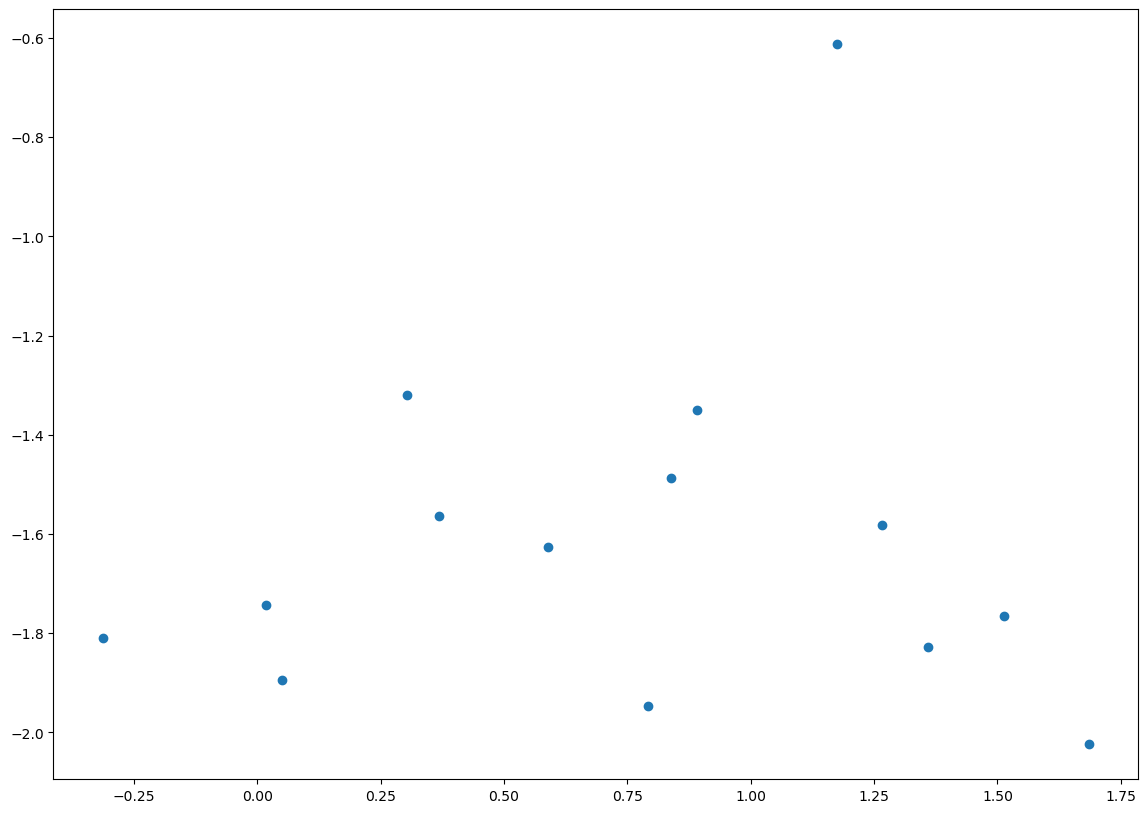

In [84]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')

plt.show()

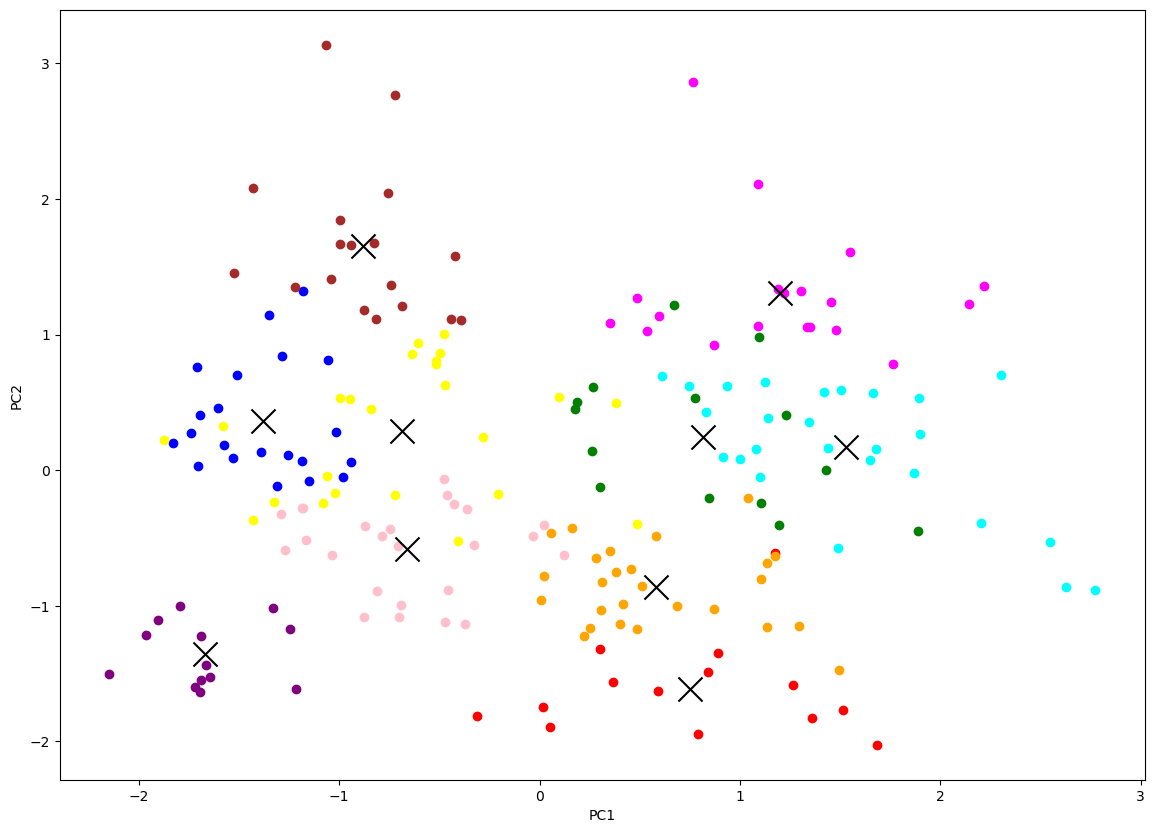

In [88]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='black', marker='x', s=300)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()